In [2]:
import numpy as np
import pandas as pd
import string
import re
import pymorphy2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data=pd.read_csv("movies (1).csv")

In [4]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
data.shape


(10329, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


## Обработка 

In [7]:
import string

In [8]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [9]:
data['pred_text'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in data['title']]

In [10]:
data['pred_genres'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in data['genres']]

In [11]:
data

,movieId,title,genres,pred_text,pred_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,toy story,adventure animation children comedy fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,jumanji,adventure children fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,grumpier old men,comedy romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,waiting to exhale,comedy drama romance
4,5,Father of the Bride Part II (1995),Comedy,father of the bride part ii,comedy
...,...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,cosmic scrat tastrophe,animation children comedy
10325,146878,Le Grand Restaurant (1966),Comedy,le grand restaurant,comedy
10326,148238,A Very Murray Christmas (2015),Comedy,a very murray christmas,comedy
10327,148626,The Big Short (2015),Drama,the big short,drama


In [12]:
english_stopwords = stopwords.words("english") 

In [13]:
#Удаляем стоп слова
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in english_stopwords]
    text = " ".join(tokens)
    return text

In [14]:
data['tokenize_text'] = [tokenize(text) for text in data['pred_text']]

In [15]:
data['tokenize_genres'] = [tokenize(text) for text in data['pred_genres']]

In [16]:
data

,movieId,title,genres,pred_text,pred_genres,tokenize_text,tokenize_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,toy story,adventure animation children comedy fantasy,toy story,adventure animation children comedy fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,jumanji,adventure children fantasy,jumanji,adventure children fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,grumpier old men,comedy romance,grumpier old men,comedy romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,waiting to exhale,comedy drama romance,waiting exhale,comedy drama romance
4,5,Father of the Bride Part II (1995),Comedy,father of the bride part ii,comedy,father bride part ii,comedy
...,...,...,...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,cosmic scrat tastrophe,animation children comedy,cosmic scrat tastrophe,animation children comedy
10325,146878,Le Grand Restaurant (1966),Comedy,le grand restaurant,comedy,le grand restaurant,comedy
10326,148238,A Very Murray Christmas (2015),Comedy,a very murray christmas,comedy,murray christmas,comedy
10327,148626,The Big Short (2015),Drama,the big short,drama,big short,drama


In [17]:
data

,movieId,title,genres,pred_text,pred_genres,tokenize_text,tokenize_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,toy story,adventure animation children comedy fantasy,toy story,adventure animation children comedy fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,jumanji,adventure children fantasy,jumanji,adventure children fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,grumpier old men,comedy romance,grumpier old men,comedy romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,waiting to exhale,comedy drama romance,waiting exhale,comedy drama romance
4,5,Father of the Bride Part II (1995),Comedy,father of the bride part ii,comedy,father bride part ii,comedy
...,...,...,...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,cosmic scrat tastrophe,animation children comedy,cosmic scrat tastrophe,animation children comedy
10325,146878,Le Grand Restaurant (1966),Comedy,le grand restaurant,comedy,le grand restaurant,comedy
10326,148238,A Very Murray Christmas (2015),Comedy,a very murray christmas,comedy,murray christmas,comedy
10327,148626,The Big Short (2015),Drama,the big short,drama,big short,drama


In [18]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bikti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bikti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bikti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
# Приводим к базовой форме
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  

lemm_texts_list = []
for text in data['tokenize_text']:
    try:
        tokens = word_tokenize(text)
        res = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
        lemmatized_text = " ".join(res)
        lemm_texts_list.append(lemmatized_text)
    except Exception as e:
        print(e)

data['text_lemm'] = lemm_texts_list


In [20]:
lemm_texts_list = []
for text in data['tokenize_genres']:
    try:
        tokens = word_tokenize(text)
        res = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
        lemmatized_text = " ".join(res)
        lemm_texts_list.append(lemmatized_text)
    except Exception as e:
        print(e)

data['genres_lemm'] = lemm_texts_list

In [21]:
data

,movieId,title,genres,pred_text,pred_genres,tokenize_text,tokenize_genres,text_lemm,genres_lemm
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,toy story,adventure animation children comedy fantasy,toy story,adventure animation children comedy fantasy,toy story,adventure animation child comedy fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,jumanji,adventure children fantasy,jumanji,adventure children fantasy,jumanji,adventure child fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,grumpier old men,comedy romance,grumpier old men,comedy romance,grumpier old men,comedy romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,waiting to exhale,comedy drama romance,waiting exhale,comedy drama romance,wait exhale,comedy drama romance
4,5,Father of the Bride Part II (1995),Comedy,father of the bride part ii,comedy,father bride part ii,comedy,father bride part ii,comedy
...,...,...,...,...,...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,cosmic scrat tastrophe,animation children comedy,cosmic scrat tastrophe,animation children comedy,cosmic scrat tastrophe,animation child comedy
10325,146878,Le Grand Restaurant (1966),Comedy,le grand restaurant,comedy,le grand restaurant,comedy,le grand restaurant,comedy
10326,148238,A Very Murray Christmas (2015),Comedy,a very murray christmas,comedy,murray christmas,comedy,murray christmas,comedy
10327,148626,The Big Short (2015),Drama,the big short,drama,big short,drama,big short,drama


In [22]:
#Используем только название фильмов
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pickle

#Преобразование текстовых данных в матрицу
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text_lemm'])

#Создание модели 
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(tfidf_matrix)

with open("vectorizerTitle.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("knn_modelTitle.pkl", "wb") as f:
    pickle.dump(model_knn, f)


In [23]:
#Используем название фильмов и жанры


data['combined_text'] = data['text_lemm'] + " " + data['genres_lemm']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_text'])

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(tfidf_matrix)

with open("vectorizerTitleGenres.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("knn_modelTitleGenres.pkl", "wb") as f:
    pickle.dump(model_knn, f)


In [24]:
import pickle
import pandas as pd

with open("vectorizerTitleGenres.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

with open("knn_modelTitleGenres.pkl", "rb") as f:
    model_knn = pickle.load(f)

def find_similar_movies(movie_name, num_neighbors=10):
    # Преобразование введённого названия фильма в вектор
    movie_tfidf = tfidf_vectorizer.transform([movie_name])
    
    # Находим ближайших соседей
    distances, indices = model_knn.kneighbors(movie_tfidf, n_neighbors=num_neighbors + 1)
    
    # Извлекаем названия и жанры похожих фильмов
    similar_movies = data.iloc[indices[0][1:]][['title', 'genres']].reset_index(drop=True)
    return similar_movies

# Пример поиска
print(find_similar_movies("toy"))


                              title  \
0                       Toys (1992)   
1               Toy Soldiers (1991)   
2                  Toy Story (1995)   
3                Toy Story 2 (1999)   
4                Toy Story 3 (2010)   
5  District 13 (Banlieue 13) (2004)   
6                     Hostel (2005)   
7                 BloodRayne (2005)   
8           Tristan & Isolde (2006)   
9              49th Parallel (1941)   

                                             genres  
0                                    Comedy|Fantasy  
1                                      Action|Drama  
2       Adventure|Animation|Children|Comedy|Fantasy  
3       Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy|IMAX  
5                               Action|Crime|Sci-Fi  
6                                            Horror  
7                                    Action|Fantasy  
8                                     Drama|Romance  
9                      Adventu

In [25]:
#data.to_csv('Fazafilms15.csv', index=False) 


In [26]:
import pickle
import pandas as pd

with open("vectorizerTitle.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

with open("knn_modelTitle.pkl", "rb") as f:
    model_knn = pickle.load(f)

def find_similar_movies(movie_name, num_neighbors=10):
    # Преобразование названия фильма в вектор
    movie_tfidf = tfidf_vectorizer.transform([movie_name])
    
    # Находим ближайшие фильмы
    distances, indices = model_knn.kneighbors(movie_tfidf, n_neighbors=num_neighbors + 1)
    
    # Выбираем похожие фильмы и их жанры из исходного датасета
    similar_movies = data.iloc[indices[0][1:]][['title', 'genres']].reset_index(drop=True)
    return similar_movies

# Пример поиска
print(find_similar_movies("story"))


                       title                                       genres
0    Story of Us, The (1999)                                 Comedy|Drama
1          Love Story (1970)                                Drama|Romance
2  Christmas Story, A (1983)                              Children|Comedy
3  Soldier's Story, A (1984)                                        Drama
4        True Stories (1986)                               Comedy|Musical
5   Story of G.I. Joe (1945)                                          War
6     West Side Story (1961)                        Drama|Musical|Romance
7          Tall Story (1960)                                       Comedy
8         Toy Story 2 (1999)  Adventure|Animation|Children|Comedy|Fantasy
9     Detective Story (1951)                        Crime|Drama|Film-Noir


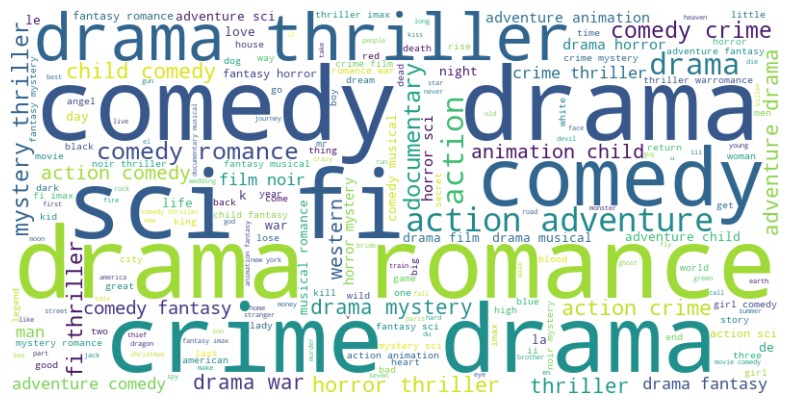

In [27]:
#Облако слов для жанров и названии
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = " ".join(data['combined_text'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=200, stopwords='english').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


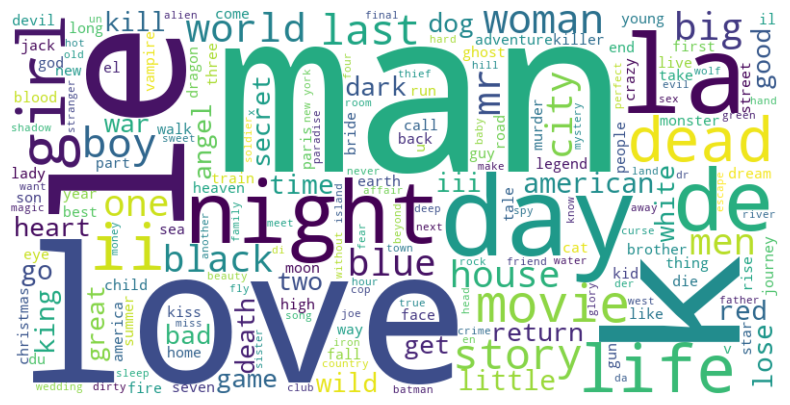

In [28]:
#Облако слов для названии


text = " ".join(data['text_lemm'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=200, stopwords='english').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [29]:
data

,movieId,title,genres,pred_text,pred_genres,tokenize_text,tokenize_genres,text_lemm,genres_lemm,combined_text
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,toy story,adventure animation children comedy fantasy,toy story,adventure animation children comedy fantasy,toy story,adventure animation child comedy fantasy,toy story adventure animation child comedy fan...
1,2,Jumanji (1995),Adventure|Children|Fantasy,jumanji,adventure children fantasy,jumanji,adventure children fantasy,jumanji,adventure child fantasy,jumanji adventure child fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,grumpier old men,comedy romance,grumpier old men,comedy romance,grumpier old men,comedy romance,grumpier old men comedy romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,waiting to exhale,comedy drama romance,waiting exhale,comedy drama romance,wait exhale,comedy drama romance,wait exhale comedy drama romance
4,5,Father of the Bride Part II (1995),Comedy,father of the bride part ii,comedy,father bride part ii,comedy,father bride part ii,comedy,father bride part ii comedy
...,...,...,...,...,...,...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,cosmic scrat tastrophe,animation children comedy,cosmic scrat tastrophe,animation children comedy,cosmic scrat tastrophe,animation child comedy,cosmic scrat tastrophe animation child comedy
10325,146878,Le Grand Restaurant (1966),Comedy,le grand restaurant,comedy,le grand restaurant,comedy,le grand restaurant,comedy,le grand restaurant comedy
10326,148238,A Very Murray Christmas (2015),Comedy,a very murray christmas,comedy,murray christmas,comedy,murray christmas,comedy,murray christmas comedy
10327,148626,The Big Short (2015),Drama,the big short,drama,big short,drama,big short,drama,big short drama
